In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la
from itertools import combinations

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [66]:
N = 5000  #Fixing number of entries

x1 = np.random.normal(loc = 0, scale = 1, size = N)
x2 = x1 + np.random.normal(loc = 0, scale = 3, size = N)
x3 = (2 * x1) + x2

dimensions = ['x_1', 'x_2', 'x_3']

#Getting a DataFrame
data = pd.DataFrame(np.array([x1, x2, x3]).T, columns = dimensions)

#Eigenvalues and eigenvectors of covariance matrix
covariance_matrix = np.cov(data.T)
print('Covariance matrix:\n', covariance_matrix)
l, V = la.eig(covariance_matrix)
print('\nEigenvalues:\n', l.real)
print('\nEigenvectors:\n', V)

#SVD method
U, spectrum, Vt = la.svd(data.T)
l_svd = (spectrum ** 2)/(N-1)
V_svd = U

#Checking if both methods lead to the same result
if np.allclose(np.sort(l), np.sort(l_svd), atol = 0.05) == True and np.allclose(np.sort(V), np.sort(V_svd), atol = 0.05) == True:
    print("\nSVD yields to the same result")
else:
    print("\nSVD doesn't yield to the same result")
    
#Getting percent variabilities
percent_variabilities = l.real * 100 / np.sum(l.real)
print("\nPercent of dataset's variability:")

for v in percent_variabilities[np.argsort(-percent_variabilities)]:
    if v > 1e-3:
        print(f'{v:.3f}%')
    else:
        print(f'{v:.3e}%')

Covariance matrix:
 [[ 0.99599003  1.05903236  3.05101241]
 [ 1.05903236 10.39459215 12.51265687]
 [ 3.05101241 12.51265687 18.61468169]]

Eigenvalues:
 [2.80291741e+01 1.62662266e-15 1.97608975e+00]

Eigenvectors:
 [[-0.11378221 -0.81649658  0.56602733]
 [-0.57945686 -0.40824829 -0.70538152]
 [-0.80702129  0.40824829  0.42667315]]

SVD yields to the same result

Percent of dataset's variability:
93.414%
6.586%
5.421e-15%


We see one very high percent and the other two that are really small, one in particular is practically zero. This is due to the fact that there is only one indipendent variable, which is $x_1$, and the other two are just derived from $x_1$:

* $x_2$ is just $x_1$ plus another gaussian distribution with same mean and different standard deviation, so we expect low variability with respect to this variable
* $x_3$ is just a combination of $x_1$ and $x_2$ so its variability should be very very low, which is what we observe

In [67]:
#Reduction of the dimensionality
data_reduced = data.copy()
data_reduced['x_3'] = 0

In order to redefine data in the basis of the PCA analysis we have to multiply the dataset by $V^T$. We also don't want to include the third dimension, so we will not consider the eigenvector that corresponds to the lowest eigenvalue.

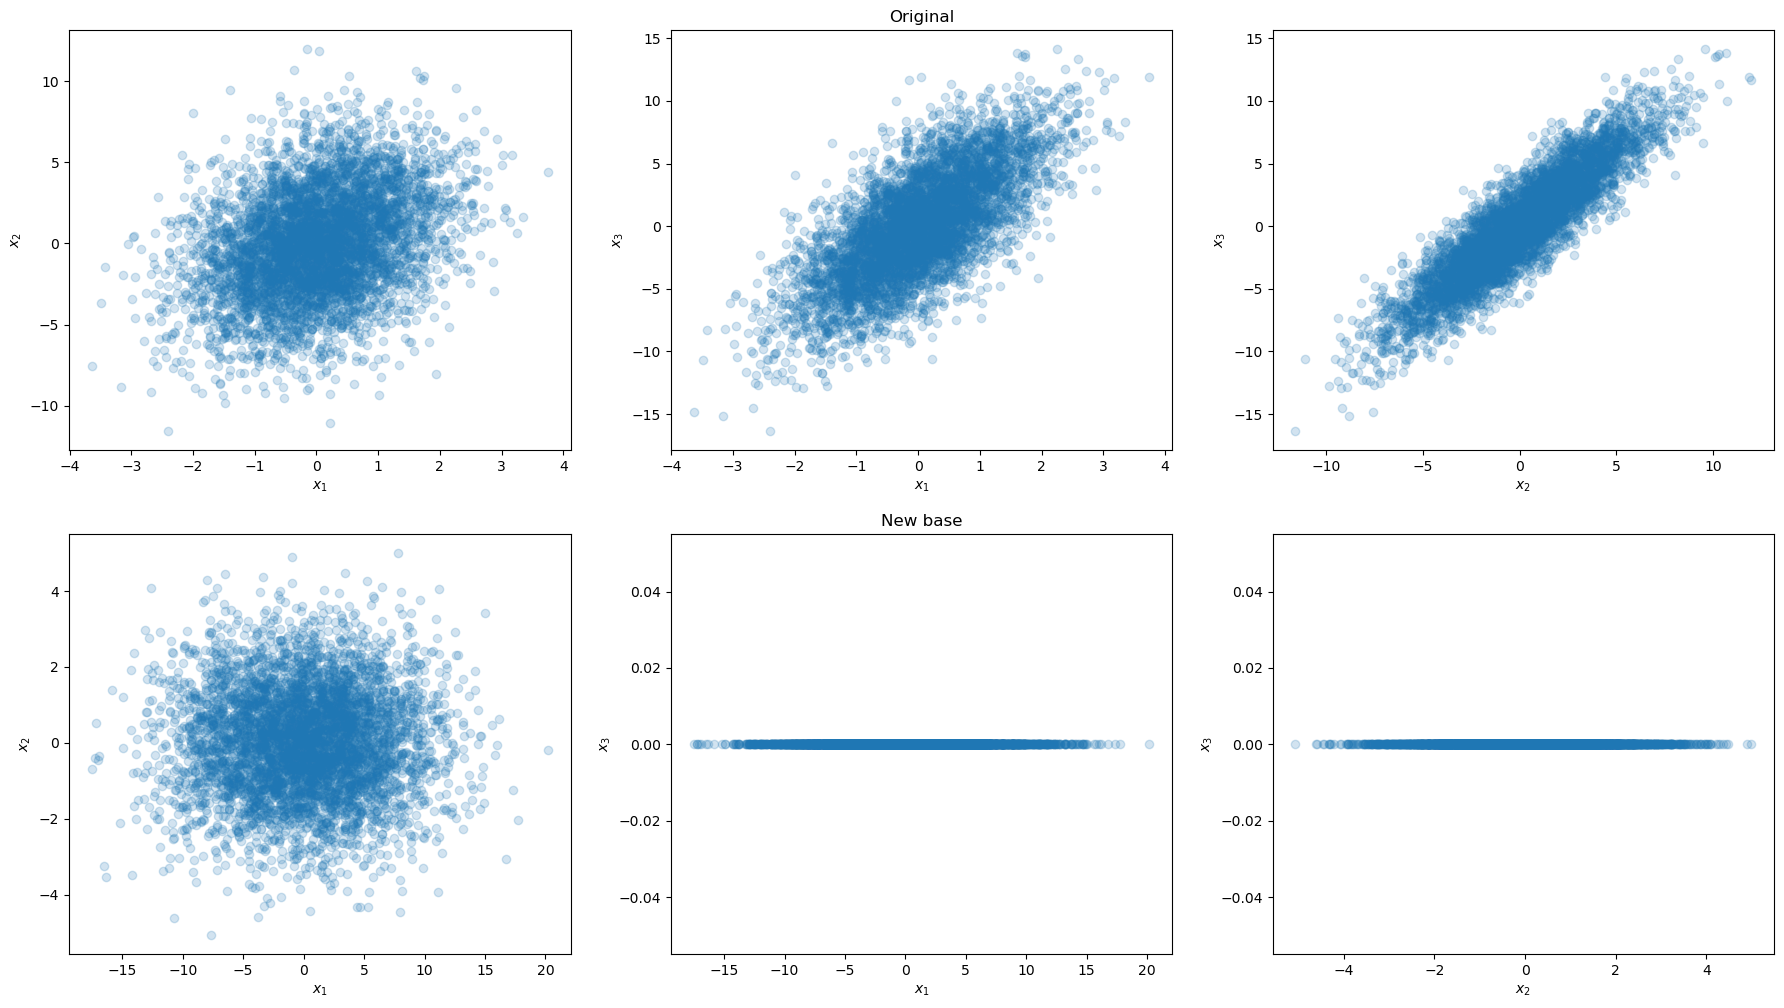

In [68]:
#Sorting the indexes of the eigenvalues (from largest to smallest)
i = l.argsort()[::-1]
#Sorting the corresponding eigenvectors
V = V[:, i]

new_dimensions = dimensions[:2]

#It's important to notice that we use the original dataset, and not the reduced one...
data_newbase = pd.DataFrame(np.dot(V[:, :2].T, data.T).T, columns = new_dimensions)
#...because we set the third component to zero only afterwards
data_newbase['x_3'] = 0

#Evaluating all pair combinations of 'x1', 'x2' and 'x3'
pairs = list(combinations(dimensions, 2))

#Plots
fig, ax = plt.subplots(2, 3, figsize = (22, 12))
ax[0,1].set_title("Original")
ax[1,1].set_title("New base")

for i, (dim1, dim2) in zip(range(0, 3), pairs):
    for j in range(0, 2):
        ax[j,i].set_xlabel(f'${dim1}$')
        ax[j,i].set_ylabel(f'${dim2}$')
        if j == 0:
            dataset = data
        elif j == 1:
            dataset = data_newbase
        ax[j,i].scatter(dataset[dim1], dataset[dim2], alpha = 0.2)

plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [17]:
mean_limit = 0.5
sigma_reduction_factor = 50
n_new_variables = 10

for i in range(4, 4 + n_new_variables):
    new_x = 'x' + str(i)
    x_i = np.random.normal(loc = np.random.uniform(-mean_limit, mean_limit), scale = (1 / sigma_reduction_factor), size = N)
    data[new_x] = x_i
    
#Eigenvalues and eigenvectors of covariance matrix
covariance_matrix = np.cov(data.T)
l, V = la.eig(covariance_matrix)

#Getting percent variabilities
percent_variabilities = l.real * 100 / np.sum(l.real)
print("\nPercent of dataset's variability:")

for v in percent_variabilities[np.argsort(-percent_variabilities)]:
    if v > 1e-3:
        print(f'{v:.3f}%')
    else:
        print(f'{v:.3e}%')


Percent of dataset's variability:
93.136%
6.851%
0.001%
0.001%
0.001%
0.001%
0.001%
0.001%
0.001%
0.001%
0.001%
0.001%
-2.339e-15%


The new variabilities don't contribute very much overall due to the very low standard deviation of the distributions.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [4]:
n_directions = 4

thetas = np.linspace(0, 2 * np.pi, n_directions)
phis = np.linspace(0, np.pi, n_directions)



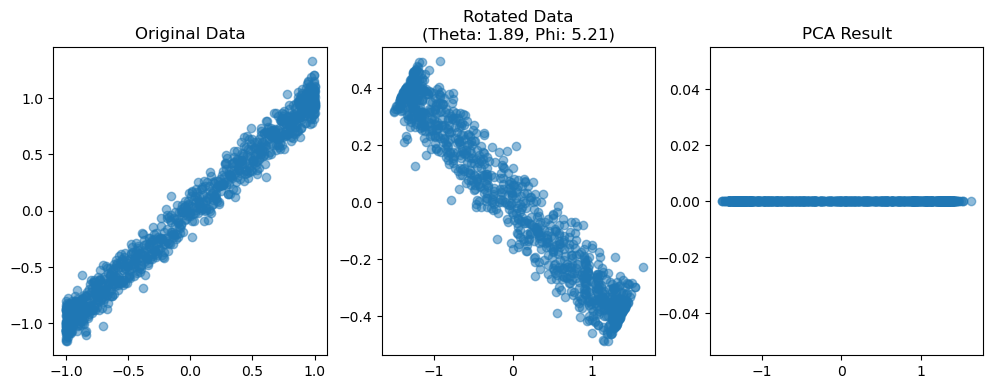

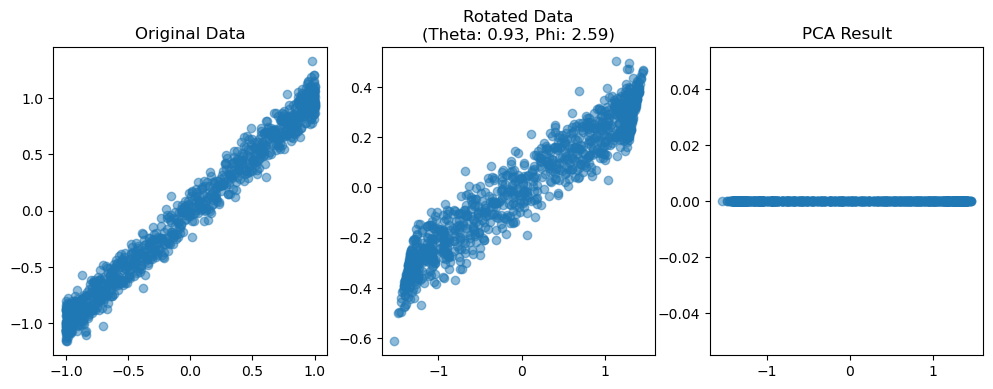

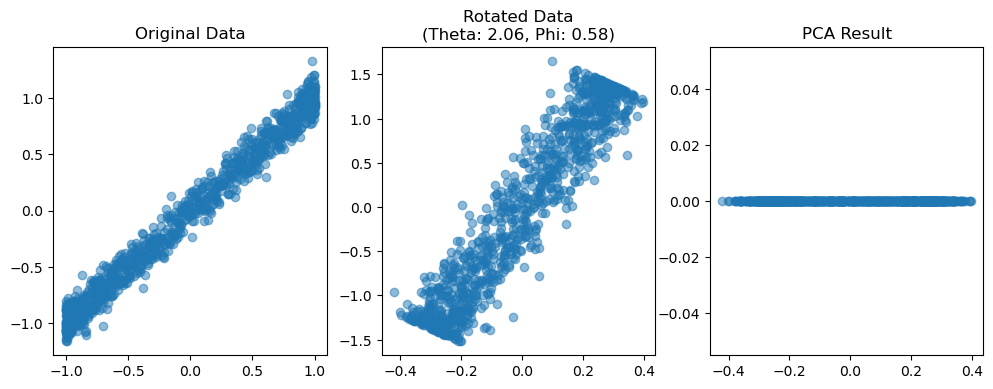

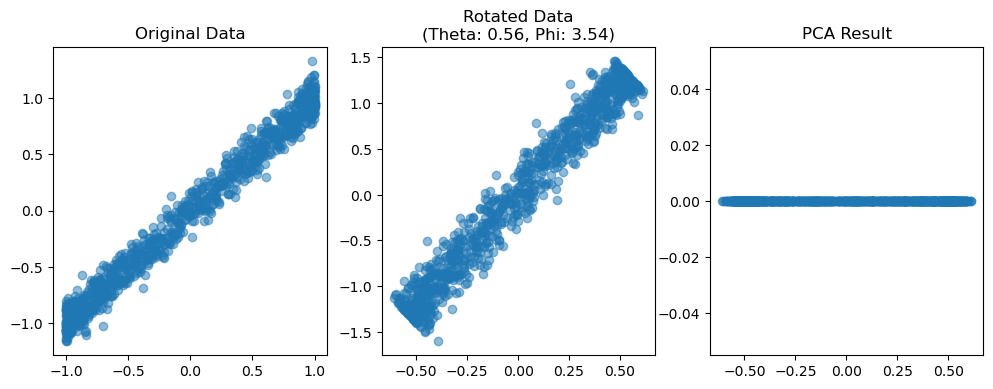

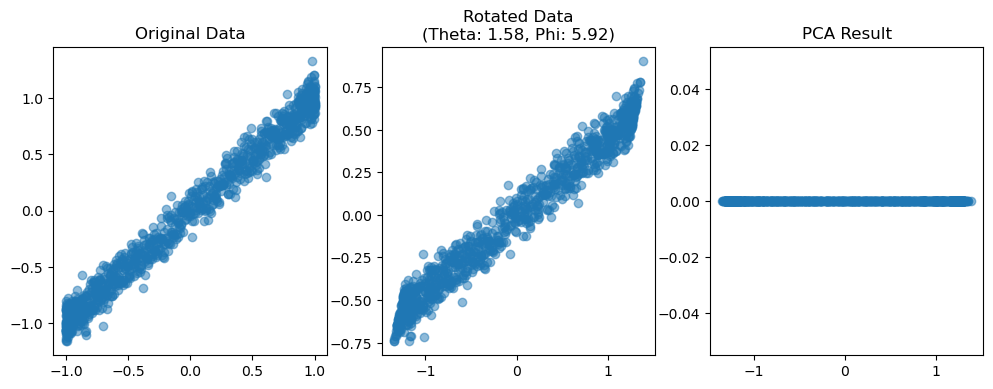

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to simulate spring motion along x-axis
def simulate_spring_motion(num_points=1000):
    t = np.linspace(0, 2 * np.pi, num_points)
    x = np.cos(t)
    y = x + 0.1 * np.random.normal(size=num_points)  # Adding random noise to y
    return np.column_stack((x, y))

# Function to rotate dataset based on spherical coordinates (theta, phi)
def rotate_dataset(data, theta, phi):
    rotation_matrix = np.array([
        [np.cos(phi), -np.sin(phi)],
        [np.sin(phi), np.cos(phi)]
    ])
    rotated_data = np.dot(data, rotation_matrix.T)
    return rotated_data

# Simulate spring motion
original_data = simulate_spring_motion()

# Number of cameras
num_cameras = 5

# Perform PCA for each camera
for i in range(num_cameras):
    # Define random spherical coordinates (theta, phi) for each camera
    theta_i = np.random.uniform(0, np.pi)
    phi_i = np.random.uniform(0, 2 * np.pi)

    # Rotate the dataset to emulate camera records
    rotated_data = rotate_dataset(original_data, theta_i, phi_i)

    # Perform PCA 
    pca = PCA(n_components=2)
    pca.fit(rotated_data)

    # Visualize the original and rotated datasets along with PCA result
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.scatter(original_data[:, 0], original_data[:, 1], alpha=0.5)
    plt.title('Original Data')

    plt.subplot(1, 3, 2)
    plt.scatter(rotated_data[:, 0], rotated_data[:, 1], alpha=0.5)
    plt.title(f'Rotated Data\n(Theta: {theta_i:.2f}, Phi: {phi_i:.2f})')

    plt.subplot(1, 3, 3)
    plt.scatter(rotated_data[:, 0], np.zeros_like(rotated_data[:, 0]), alpha=0.5)
    plt.title('PCA Result')

    plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 